In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values

# Distribution of Legit transaction and fraudulent transaction

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly inbalanced

0 - Normal Transaction   

1 - Fraudulent Transaction 

<AxesSubplot:xlabel='Class', ylabel='count'>

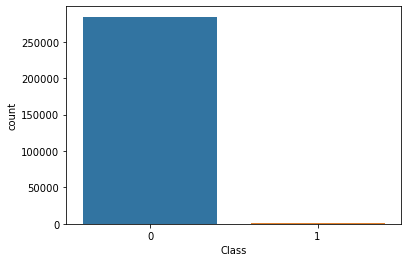

In [8]:
sns.countplot(df['Class'])

# Separating the data for analytics

In [9]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Statistical measures of the data

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Comparing the values for both transactions

In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Undersampling

Building a sample dataset containing similar distribution of normal transaction and fraudulent transaction

Number of Fraudulent Transactions - 492

In [14]:
legit_sample = legit.sample(n=492,random_state=40)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202070,134159.0,-0.921158,-1.925202,-0.782766,-1.180854,-0.076959,-0.035928,-0.559007,0.650455,-0.672925,...,0.321692,0.010665,1.050504,0.065557,-2.331855,-0.884757,0.221220,0.121447,218.66,0
12040,20848.0,0.668686,-0.697375,1.117044,1.549906,-0.723894,1.097700,-0.729808,0.424299,1.873872,...,0.184557,0.500639,-0.184276,-0.338696,0.198689,-0.256343,0.027221,0.043667,197.10,0
179159,123950.0,2.111123,-0.019308,-1.339996,0.247589,0.254139,-0.802008,0.216917,-0.329924,0.484608,...,-0.326674,-0.770057,0.246362,-0.635873,-0.182927,0.236462,-0.067172,-0.065434,1.98,0
227282,145014.0,-1.708039,1.627019,2.726252,4.663185,-1.226953,2.356677,-1.663011,1.636713,-0.702054,...,0.143207,0.855684,-0.208977,-0.278055,0.319797,0.676672,0.194401,0.071346,0.00,0
81983,59190.0,-0.818633,0.377243,0.529654,-1.376692,-0.695278,-0.410170,1.791658,-0.519795,-1.674773,...,-0.693881,-1.506301,0.017896,-0.155631,-0.276809,-0.024839,-0.061253,0.055447,239.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227211,144979.0,0.079253,1.047021,1.094760,4.687515,-0.043957,1.667897,-1.427438,-2.523012,-1.769949,...,-0.972383,1.146508,-0.545551,-0.584489,0.495162,0.652071,0.177492,0.308740,112.78,0
263424,160949.0,-0.509598,2.852372,-1.520427,4.914511,0.273114,-0.408886,-0.069607,0.899770,-1.636631,...,-0.405086,-1.120017,0.285904,-0.444914,-0.584879,0.072876,0.263813,0.075039,2.72,0
272472,165106.0,-0.655552,0.581551,1.717533,-0.772746,-0.075176,-0.049085,0.378996,-0.045349,0.506720,...,0.237702,0.993601,-0.248385,0.071178,-0.440079,0.478842,-0.070492,0.001567,11.50,0
65071,51419.0,-1.137384,1.077468,0.675937,0.371899,-0.128627,-0.514519,0.769435,0.071492,-0.324724,...,-0.399381,-1.005893,0.220882,0.023325,-0.281736,0.050590,-0.354382,-0.261632,58.95,0


# Concatenating two DataFrames

In [15]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202070,134159.0,-0.921158,-1.925202,-0.782766,-1.180854,-0.076959,-0.035928,-0.559007,0.650455,-0.672925,...,0.321692,0.010665,1.050504,0.065557,-2.331855,-0.884757,0.221220,0.121447,218.66,0
12040,20848.0,0.668686,-0.697375,1.117044,1.549906,-0.723894,1.097700,-0.729808,0.424299,1.873872,...,0.184557,0.500639,-0.184276,-0.338696,0.198689,-0.256343,0.027221,0.043667,197.10,0
179159,123950.0,2.111123,-0.019308,-1.339996,0.247589,0.254139,-0.802008,0.216917,-0.329924,0.484608,...,-0.326674,-0.770057,0.246362,-0.635873,-0.182927,0.236462,-0.067172,-0.065434,1.98,0
227282,145014.0,-1.708039,1.627019,2.726252,4.663185,-1.226953,2.356677,-1.663011,1.636713,-0.702054,...,0.143207,0.855684,-0.208977,-0.278055,0.319797,0.676672,0.194401,0.071346,0.00,0
81983,59190.0,-0.818633,0.377243,0.529654,-1.376692,-0.695278,-0.410170,1.791658,-0.519795,-1.674773,...,-0.693881,-1.506301,0.017896,-0.155631,-0.276809,-0.024839,-0.061253,0.055447,239.95,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 202070 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In the above, 30 columns are having float datatype and 1 column has int datatype.

In [19]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92928.111789,-0.096431,0.037985,-0.041280,0.062520,-0.128535,0.019126,0.113250,0.088465,-0.043408,...,0.025593,0.012837,-0.042793,0.013016,-0.007123,0.015708,-0.003624,0.026910,0.020544,110.727947
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<AxesSubplot:xlabel='Time', ylabel='Amount'>

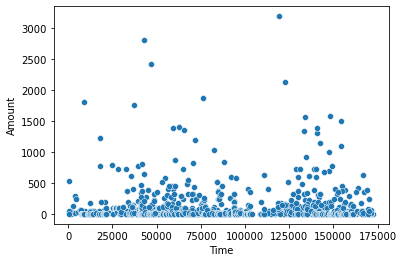

In [21]:
sns.scatterplot(y= 'Amount',x= 'Time', data= new_dataset)

<AxesSubplot:xlabel='Time'>

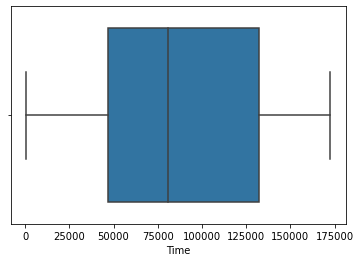

In [22]:
sns.boxplot(new_dataset['Time'])

In [23]:
new_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86837.459350,-2.434190,1.830881,-3.537281,2.302275,-1.639880,-0.689306,-2.727741,0.329550,-1.312265,...,0.363213,-0.014372,-0.013646,-0.056126,0.028578,0.024012,0.098742,0.048106,116.469634,0.500000
std,47209.499214,5.556934,3.767157,6.223621,3.214752,4.206028,1.753380,5.901231,4.859228,2.326304,...,2.781475,1.164265,1.192362,0.540538,0.675155,0.474520,1.016712,0.418375,283.051886,0.500254
min,406.000000,-30.552380,-22.935777,-31.103685,-3.500801,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.300010,-7.263482,-1.869290,0.000000,0.000000
25%,46917.500000,-2.875945,-0.142408,-5.120349,-0.046221,-1.898358,-1.587519,-3.066415,-0.211137,-2.358571,...,-0.176581,-0.549036,-0.235142,-0.376592,-0.319191,-0.295559,-0.062469,-0.057216,1.535000,0.000000
50%,80795.000000,-0.847775,1.032333,-1.340459,1.385313,-0.470816,-0.670143,-0.620894,0.147269,-0.711704,...,0.134610,-0.001357,-0.032898,0.002502,0.059005,-0.014283,0.053163,0.040016,19.030000,0.500000
75%,132104.750000,1.039246,2.849861,0.315901,4.327523,0.444767,0.105477,0.305139,0.906997,0.137877,...,0.648533,0.523921,0.199827,0.350931,0.398110,0.322230,0.472290,0.225936,99.990000,1.000000
max,172605.000000,2.287804,22.057729,3.760965,12.114672,11.095089,6.474115,9.421935,20.007208,6.209308,...,27.202839,8.361985,5.466230,1.166330,2.208209,2.745261,3.987021,2.081454,3185.750000,1.000000


50% of the data are below 80795 Time

In [24]:
#plt.figure(figsize=(20,12))
#sns.heatmap(new_dataset.corr(),annot=True)
new_dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.223151,-0.200804,0.146230,-0.195805,0.277958,0.113846,0.219510,-0.144159,0.151933,...,-0.054264,0.111560,0.045462,0.011402,-0.190469,-0.044678,-0.143104,0.006847,0.025875,-0.129079
V1,0.223151,1.000000,-0.757645,0.880768,-0.605936,0.866851,0.291237,0.861818,-0.079837,0.640059,...,0.014404,-0.045228,-0.036643,-0.060823,-0.091678,0.050283,0.169559,0.200262,-0.045068,-0.420906
V2,-0.200804,-0.757645,1.000000,-0.832888,0.644447,-0.751751,-0.318510,-0.846752,-0.002495,-0.676359,...,0.036724,0.012790,0.145732,0.003333,0.099837,0.020314,-0.166165,0.019820,-0.292450,0.476170
V3,0.146230,0.880768,-0.832888,1.000000,-0.761815,0.852730,0.457875,0.883936,-0.169017,0.751410,...,0.027376,-0.067384,-0.025970,0.008638,-0.082138,-0.009532,0.099140,0.148508,0.000473,-0.562017
V4,-0.195805,-0.605936,0.644447,-0.761815,1.000000,-0.568032,-0.413578,-0.701065,0.092704,-0.774805,...,-0.023322,0.131835,0.009612,-0.077519,-0.028454,0.159653,-0.014592,-0.094779,-0.007214,0.697066
V5,0.277958,0.866851,-0.751751,0.852730,-0.568032,1.000000,0.283354,0.827839,-0.201546,0.648560,...,0.038624,-0.090002,-0.084919,-0.136936,-0.083207,0.055426,0.178991,0.195161,-0.128314,-0.359511
V6,0.113846,0.291237,-0.318510,0.457875,-0.413578,0.283354,1.000000,0.303320,-0.571097,0.360570,...,0.030281,-0.012187,0.300107,-0.038325,-0.115653,-0.032979,-0.145285,-0.050897,0.219640,-0.404243
V7,0.219510,0.861818,-0.846752,0.883936,-0.701065,0.827839,0.303320,1.000000,0.078697,0.753853,...,0.040836,-0.128423,-0.084119,-0.047863,0.052697,0.028012,0.239854,0.154151,0.160328,-0.481668
V8,-0.144159,-0.079837,-0.002495,-0.169017,0.092704,-0.201546,-0.571097,0.078697,1.000000,-0.072434,...,-0.119863,0.044796,-0.402509,0.078806,0.228828,0.047675,0.275587,-0.000754,-0.004779,0.049639
V9,0.151933,0.640059,-0.676359,0.751410,-0.774805,0.648560,0.360570,0.753853,-0.072434,1.000000,...,0.156667,-0.257389,-0.062714,0.009494,-0.001835,-0.118469,0.145952,0.157736,0.031796,-0.545717


# Splitting the data into Features and Targets

In [25]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [26]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
202070  134159.0 -0.921158 -1.925202 -0.782766 -1.180854 -0.076959 -0.035928   
12040    20848.0  0.668686 -0.697375  1.117044  1.549906 -0.723894  1.097700   
179159  123950.0  2.111123 -0.019308 -1.339996  0.247589  0.254139 -0.802008   
227282  145014.0 -1.708039  1.627019  2.726252  4.663185 -1.226953  2.356677   
81983    59190.0 -0.818633  0.377243  0.529654 -1.376692 -0.695278 -0.410170   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [27]:
print(Y)

202070    0
12040     0
179159    0
227282    0
81983     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Splitting the data into Training data and Testing data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

# Logistic Regresssion

In [30]:
lr= LogisticRegression()
lr.fit(X_train, Y_train)
ypred=lr.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(Y_test,ypred)
cm= confusion_matrix(Y_test,ypred)
cr= classification_report(Y_test,ypred)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.9441624365482234

Confusion Matrix:
[[97  2]
 [ 9 89]]

Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.91      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [32]:
tr=lr.score(X_train,Y_train)
te= lr.score(X_test,Y_test)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 0.9453621346886912
Testing Accuracy: 0.9441624365482234


# SVC

In [33]:
from sklearn import svm
svm= svm.SVC()
svm.fit(X_train, Y_train)
y_pred2= svm.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(Y_test,y_pred2)
cm= confusion_matrix(Y_test,y_pred2)
cr= classification_report(Y_test,y_pred2)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.5532994923857868

Confusion Matrix:
[[62 37]
 [51 47]]

Classification Report :
              precision    recall  f1-score   support

           0       0.55      0.63      0.58        99
           1       0.56      0.48      0.52        98

    accuracy                           0.55       197
   macro avg       0.55      0.55      0.55       197
weighted avg       0.55      0.55      0.55       197



In [35]:
tr=svm.score(X_train,Y_train)
te= svm.score(X_test,Y_test)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 0.554002541296061
Testing Accuracy: 0.5532994923857868


# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred3= knn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(Y_test,y_pred3)
cm= confusion_matrix(Y_test,y_pred3)
cr= classification_report(Y_test,y_pred3)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.6548223350253807

Confusion Matrix:
[[74 25]
 [43 55]]

Classification Report :
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        99
           1       0.69      0.56      0.62        98

    accuracy                           0.65       197
   macro avg       0.66      0.65      0.65       197
weighted avg       0.66      0.65      0.65       197



In [38]:
tr=knn.score(X_train,Y_train)
te= knn.score(X_test,Y_test)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 0.7522236340533672
Testing Accuracy: 0.6548223350253807


This is the case of overfitting due to Low bias and High variance.

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred4= dt.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(Y_test,y_pred4)
cm= confusion_matrix(Y_test,y_pred4)
cr= classification_report(Y_test,y_pred4)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.8781725888324873

Confusion Matrix:
[[86 13]
 [11 87]]

Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        99
           1       0.87      0.89      0.88        98

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



In [41]:
tr=dt.score(X_train,Y_train)
te=dt.score(X_test,Y_test)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 1.0
Testing Accuracy: 0.8781725888324873


This is the case of overfitting due to Low bias and High variance.

# Model Accuracy

In [42]:
Model_data= pd.DataFrame({'Models': ['LR','SVC','KNN','DT'],'Acc':[accuracy_score(Y_test,ypred),
                                                                            accuracy_score(Y_test,y_pred2),
                                                                            accuracy_score(Y_test,y_pred3),
                                                                            accuracy_score(Y_test,y_pred4)]})

In [43]:
Model_data

,Models,Acc
0,LR,0.944162
1,SVC,0.553299
2,KNN,0.654822
3,DT,0.878173


# Saving the Model

In [44]:
lr.fit(X,Y)

LogisticRegression()

In [45]:
import joblib

In [46]:
joblib.dump(lr,'Creditcardfraud_model')

['Creditcardfraud_model']

In [47]:
model= joblib.load('Creditcardfraud_model')

In [48]:
pd.set_option('display.max_columns', None)
new_dataset.sample(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105178,69394.0,1.140431,1.134243,-1.429455,2.012226,0.622800,-1.152923,0.221159,0.037372,0.034486,-1.879644,2.191665,-0.487850,-1.757137,-4.461051,-0.402884,1.410917,3.619251,2.284927,-0.443999,-0.099712,-0.367136,-0.891627,-0.160578,-0.108326,0.668374,-0.352393,0.071993,0.113684,1.0,1
8296,11080.0,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,12.018913,-17.769143,-0.431036,-19.214325,-0.962465,-10.266609,-15.503392,-5.494928,-0.410481,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.0,1


In [49]:
model.predict([[161259.0,2.051430,-2.059339,-0.530012,-1.478775,-1.928196,-0.191035,-1.665812,0.137622,-0.667945,1.708391,-0.105091,-1.295042,-1.629992,-0.159858,-0.560245,0.017746,0.187287,1.187248,0.054800,-0.356135,0.112359,0.579655,0.052624,-0.376523,-0.304813,0.008734,0.009983,-0.043389,110.0]])

array([0], dtype=int64)

In [50]:
model.predict([[11635.0,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,-4.137840,4.570113,-7.629170,1.733917,-9.440375,-0.023353,-1.233958,1.632009,1.315735,-0.287189,0.535435,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.00]])

array([1], dtype=int64)